In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
features = np.array([[50, 100], [50, 100]])

In [37]:
def generate_item(features):
    item = []
    for feature in features:
        item = np.hstack([item, (np.random.uniform(*feature, 1))])
    return np.array(item)

In [38]:
def gen_population(features, n=100):
    population = []
    
    for i in range(n):
        population.append(generate_item(features))
    
    return np.array(population)
    

In [39]:
population = gen_population(features)

In [41]:
# population

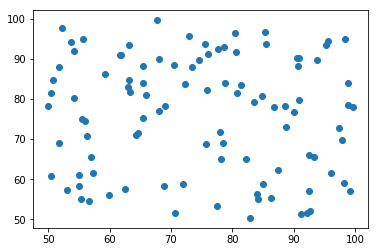

In [42]:
plt.scatter(population[:, 0], population[:, 1])

In [44]:
prof = [(np.array([75, 60]), 10), (np.array([60, 75]), 10)]

In [68]:
def fitness(population, prof):
    prof_loc = np.array(prof)[:, 0]
    prof_pow = np.array(prof)[:, 1]
    
    fitness = np.zeros([len(population), 0])
        
    for loc in prof_loc:
        out = np.sum((population - loc) ** 2, axis=1, keepdims=True)  
        fitness = np.hstack([fitness, out])
    
    return np.min(fitness, axis=1)

In [80]:
def get_selected(population, prof, factor=2):    
    fit = fitness(population, prof)
    selected_idx = np.argsort(fit)[:len(population) // factor]
    return population[selected_idx]
    

In [82]:
selected = get_selected(population, prof)

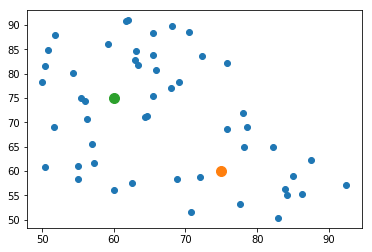

In [88]:
# plt.scatter(population[:, 0], population[:, 1])
plt.scatter(selected[:, 0], selected[:, 1])

for p in prof:
    p_loc = p[0]
    plt.scatter(p_loc[0], p_loc[1], s = 100)

In [113]:
def mutate(item):
    return item + np.random.uniform(-2, 2, 2)

In [114]:
def cross(population, n=100):
    gen = []
    for i in range(n):
        item = np.zeros([2])
        parents = random.choices(population, k=2)
        item[0] = parents[0][0]
        item[1] = parents[1][1]
        gen.append(mutate(item))
    return np.array(gen)
    

In [115]:
def display(population, prof):
    plt.figure()
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.scatter(population[:, 0], population[:, 1])
    for p in prof:
        p_loc = p[0]
        plt.scatter(p_loc[0], p_loc[1], s = 100)

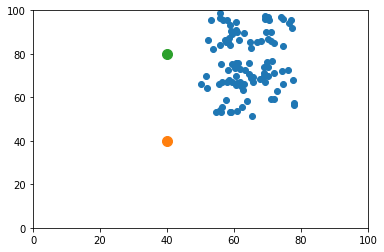

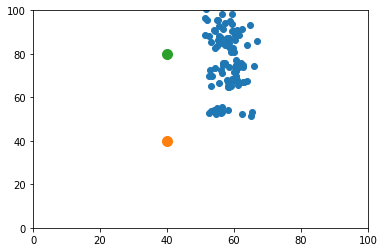

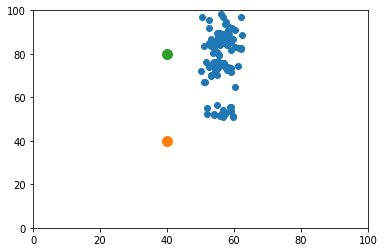

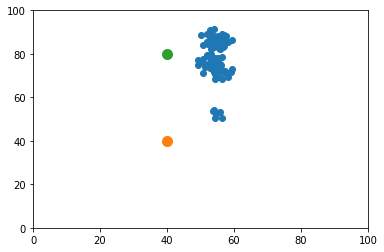

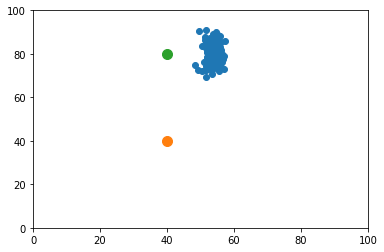

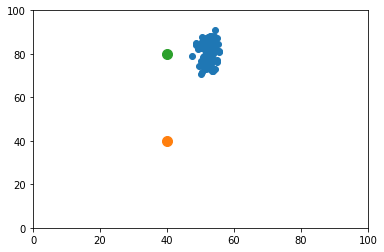

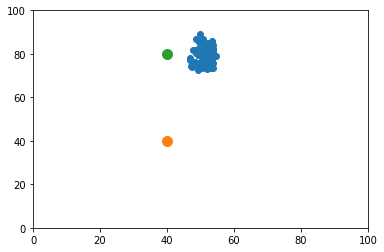

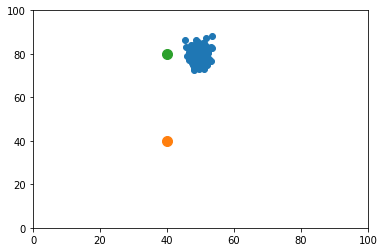

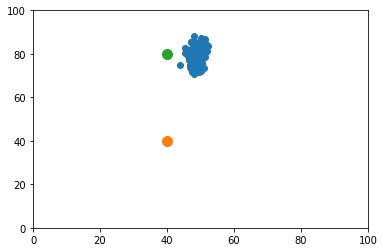

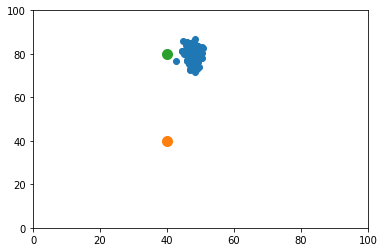

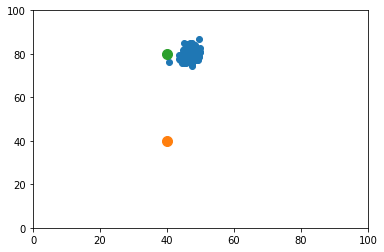

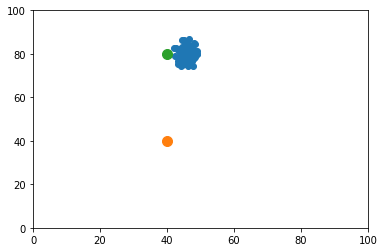

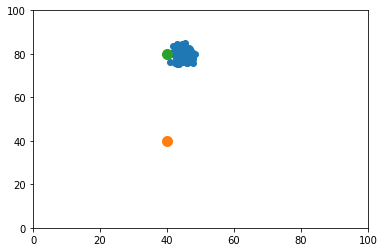

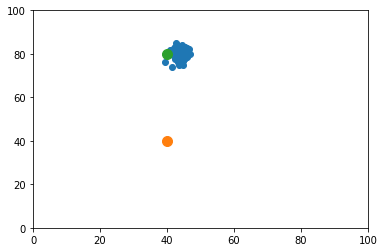

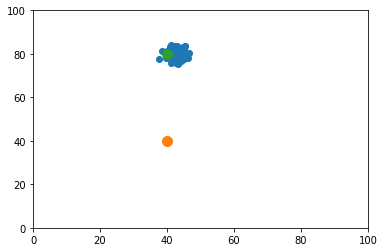

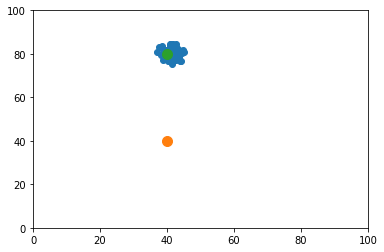

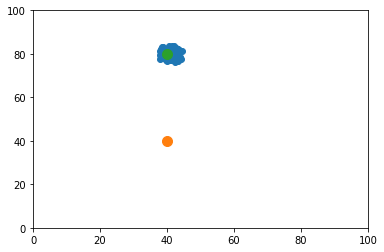

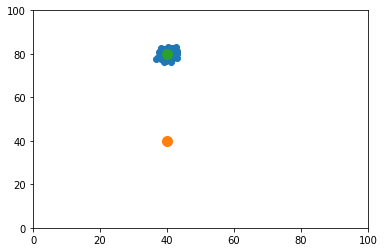

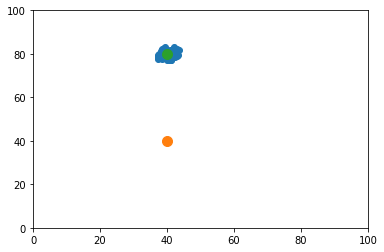

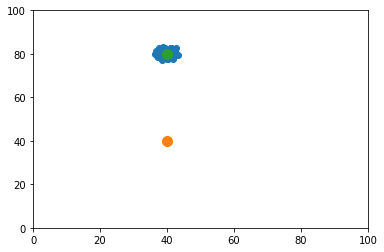

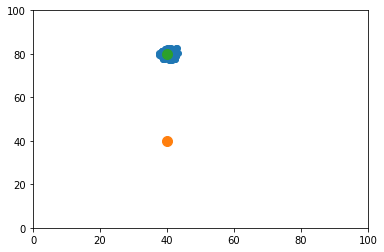

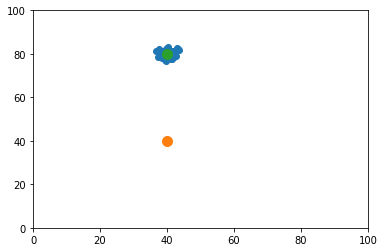

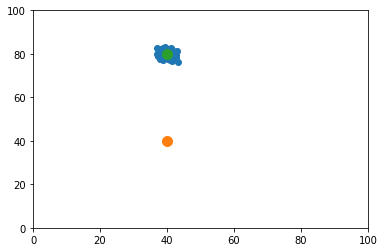

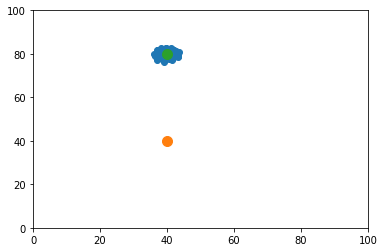

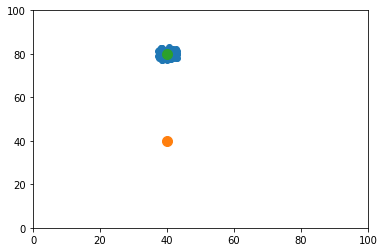

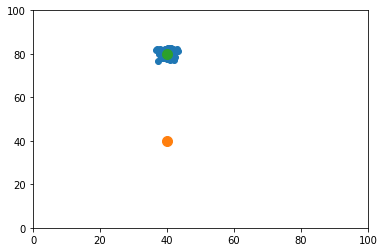

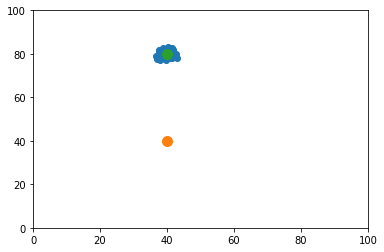

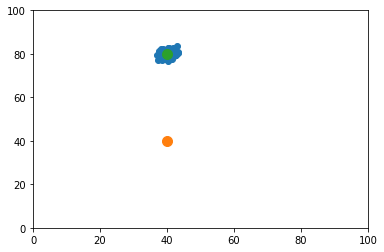

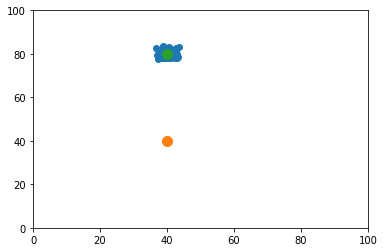

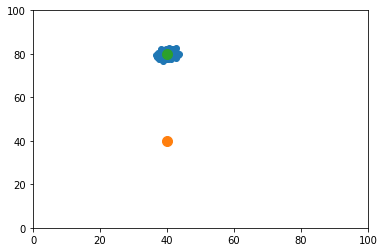

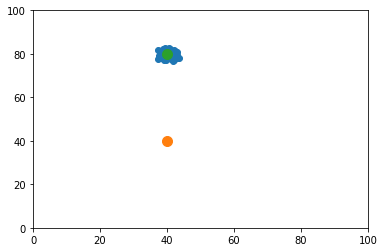

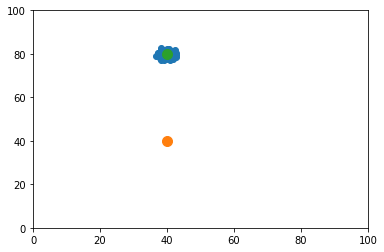

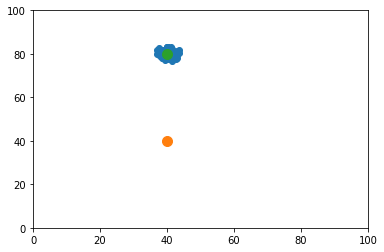

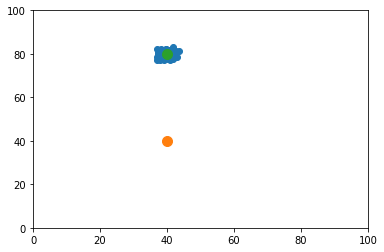

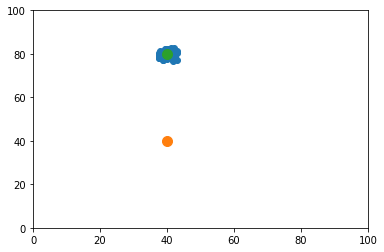

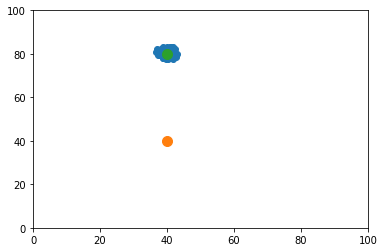

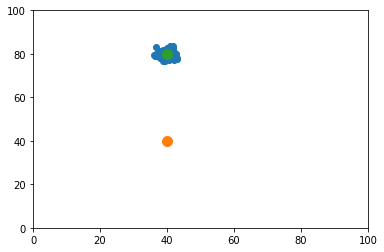

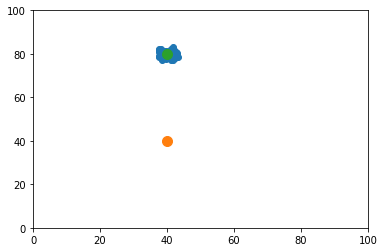

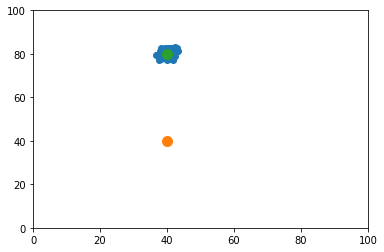

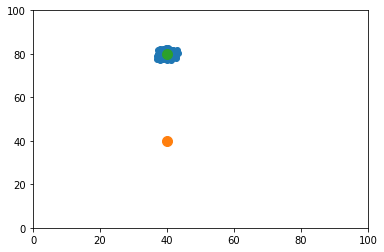

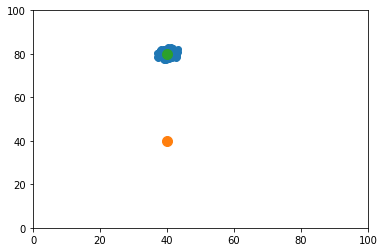

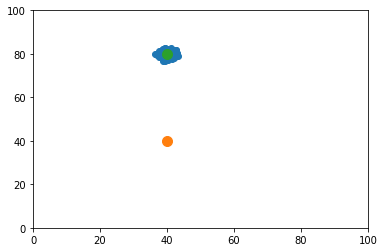

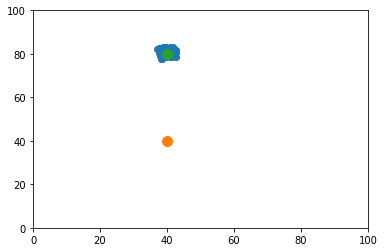

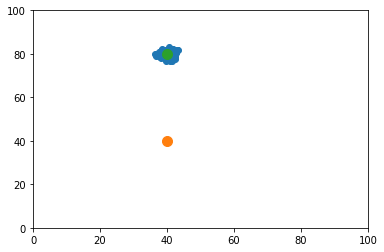

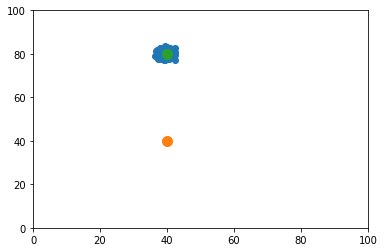

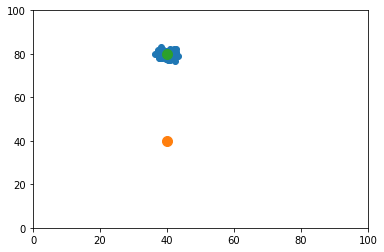

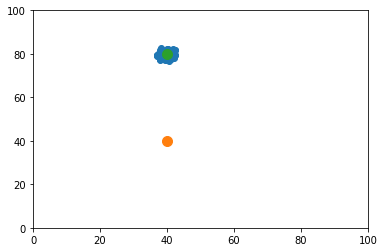

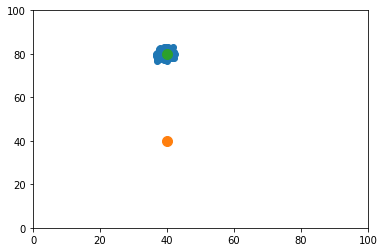

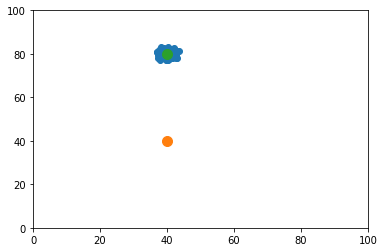

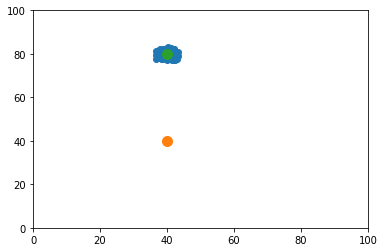

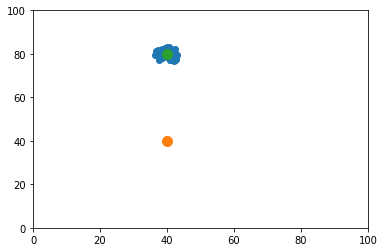

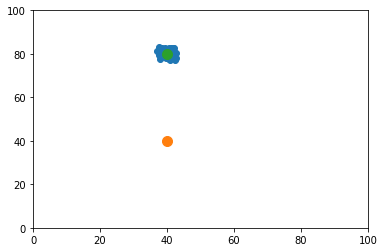

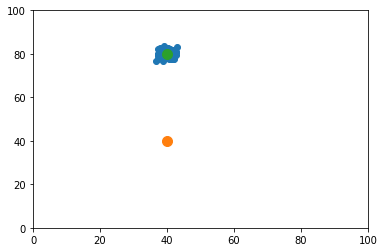

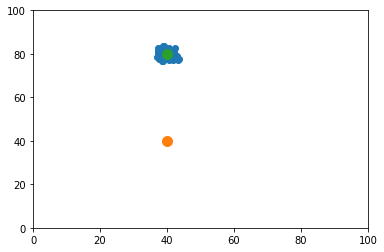

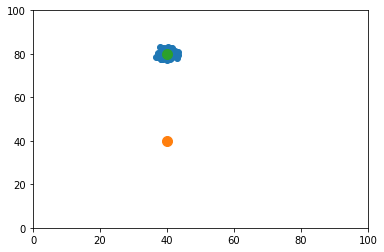

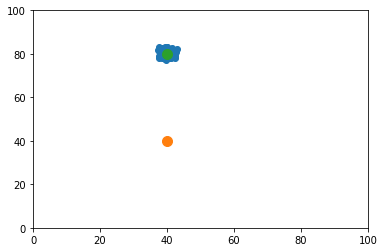

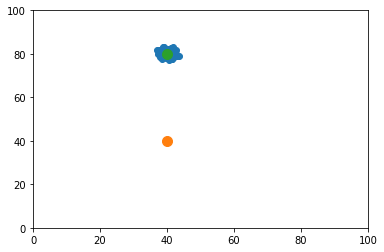

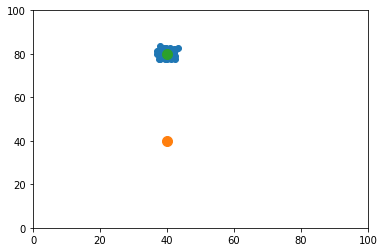

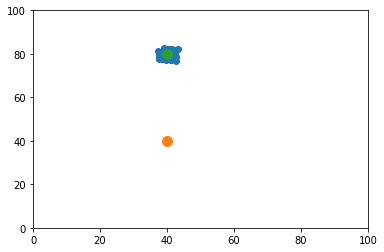

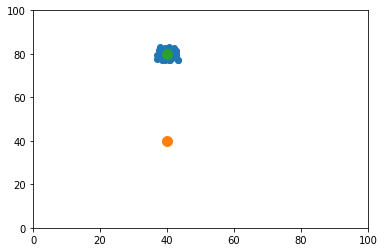

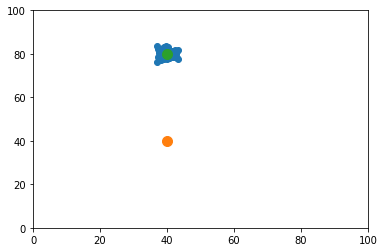

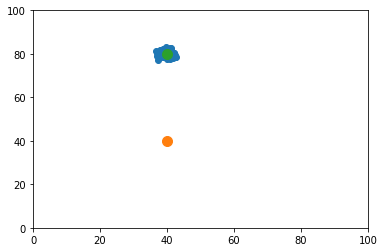

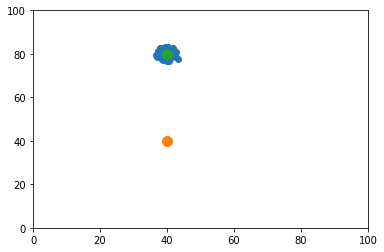

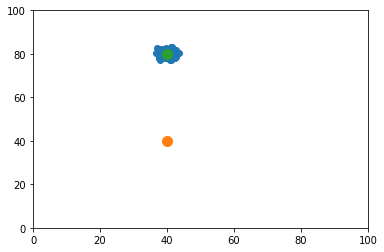

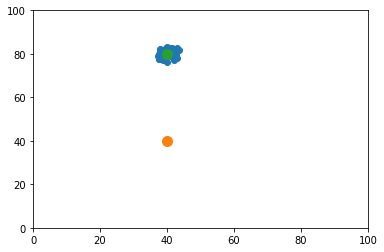

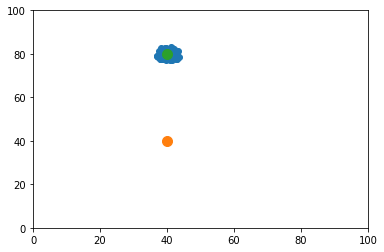

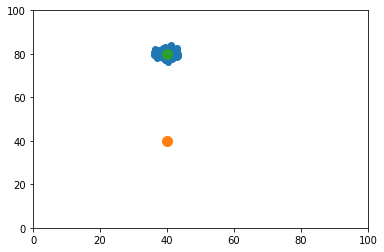

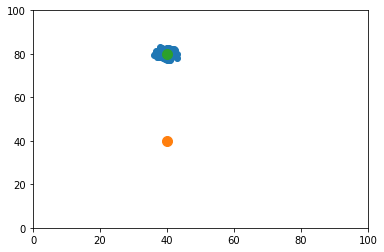

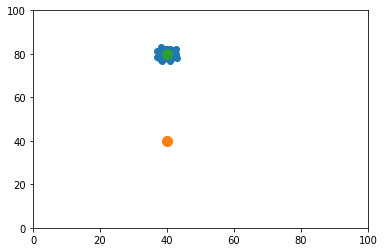

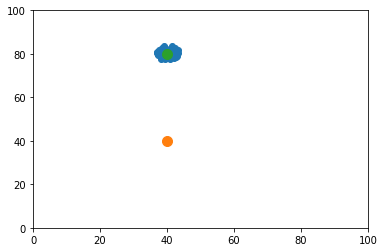

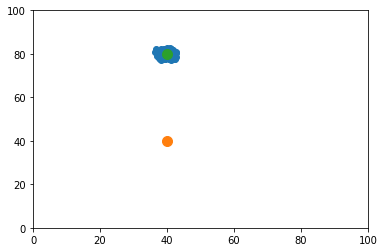

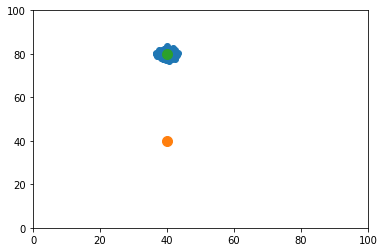

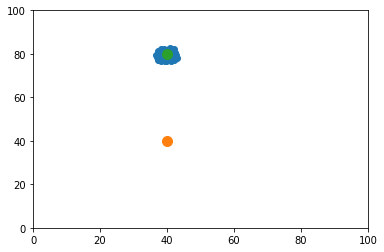

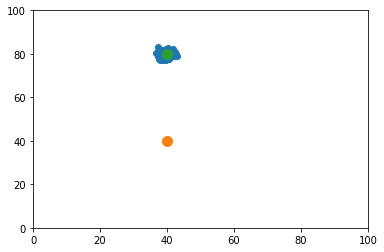

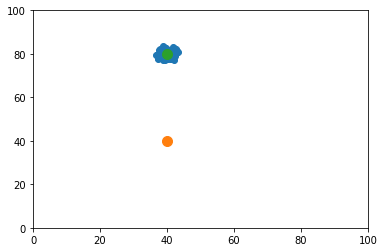

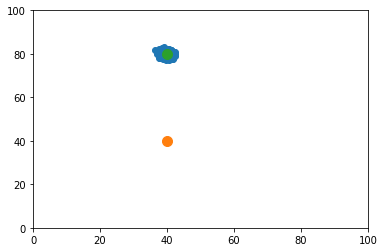

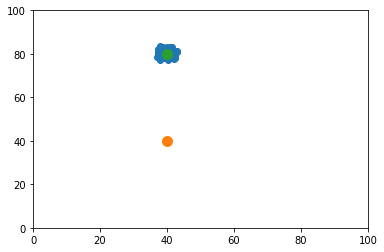

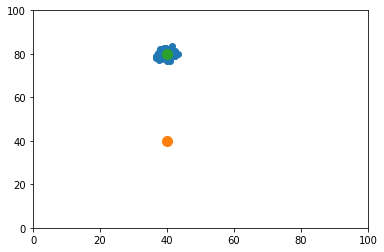

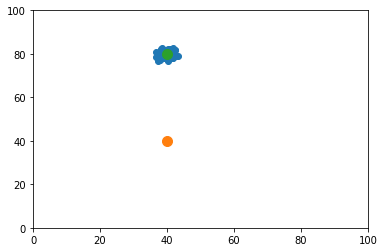

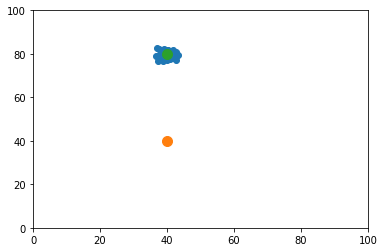

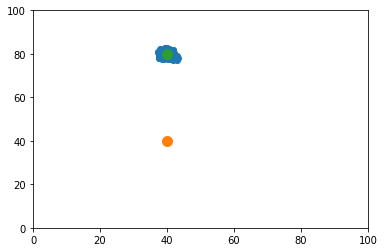

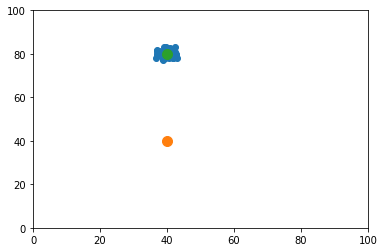

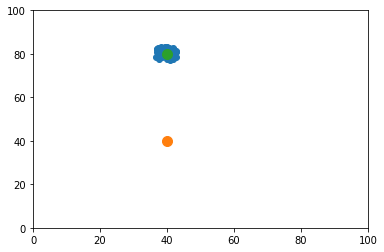

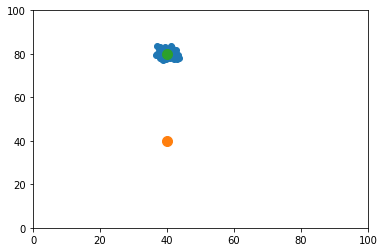

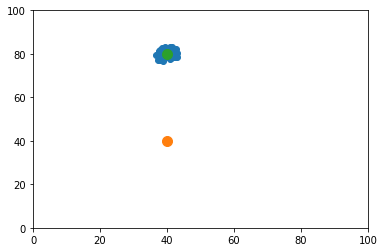

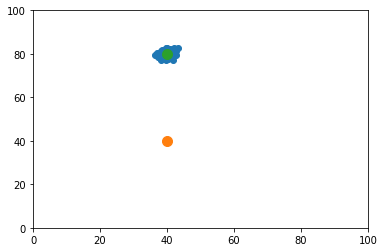

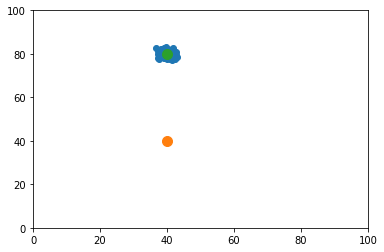

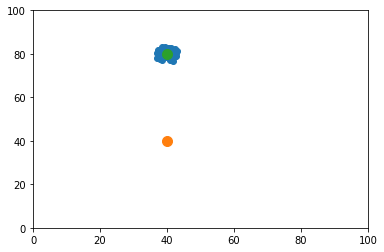

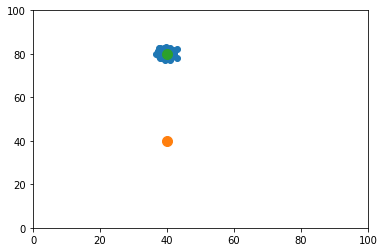

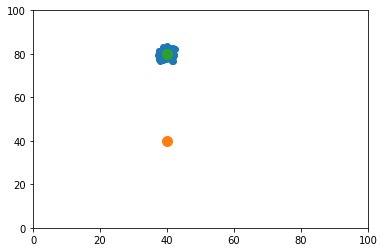

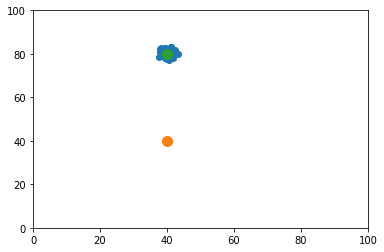

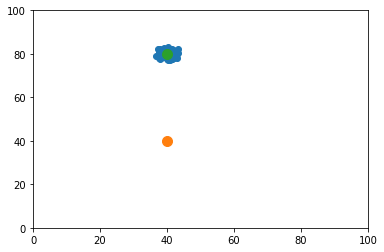

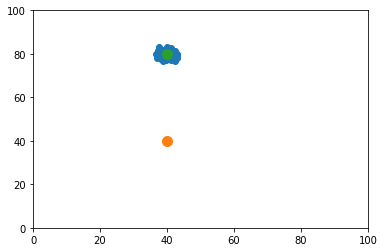

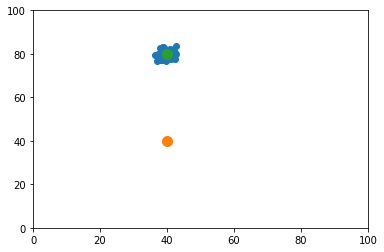

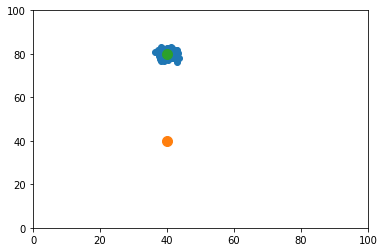

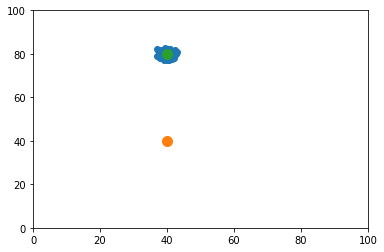

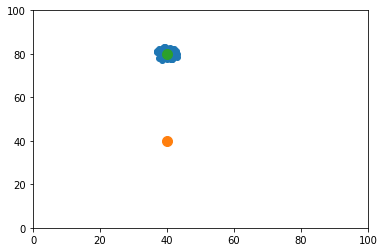

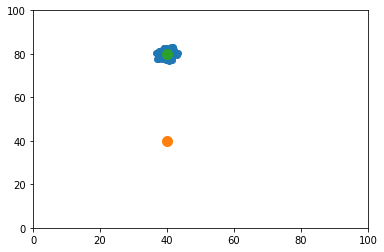

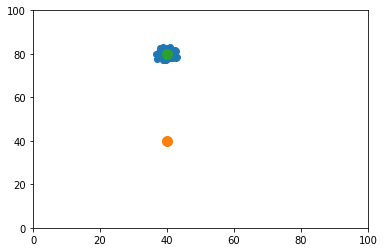

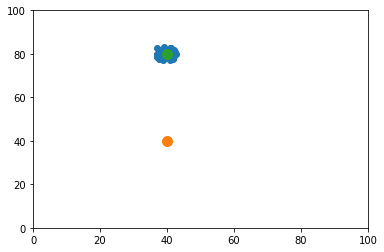

In [116]:
features = np.array([[50, 100], [50, 100]])
population = gen_population(features)
prof = [(np.array([40, 40]), 10), (np.array([40, 80]), 10)]

for i in range(100):
    selected = get_selected(population, prof)
    population = cross(selected)
    display(population, prof)